DETERMINACIÓN DEL K ÓPTIMO PARA K-MEANS - SISTEMA DE ENTREGAS
✅ Datos PCA cargados exitosamente: (1000, 9)
Columnas disponibles: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

Datos para análisis: (1000, 9)
Componentes principales: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

MÉTODO DEL CODO (ELBOW METHOD)
Calculando inercias y scores de silhouette...
Probando k=1... Inercia: 12324.57
Probando k=2... Inercia: 10160.16, Silhouette: 0.168
Probando k=3... Inercia: 8950.83, Silhouette: 0.185
Probando k=4... Inercia: 8283.79, Silhouette: 0.162
Probando k=5... Inercia: 7740.21, Silhouette: 0.135
Probando k=6... Inercia: 7328.78, Silhouette: 0.137
Probando k=7... Inercia: 6994.01, Silhouette: 0.125
Probando k=8... Inercia: 6741.55, Silhouette: 0.123
Probando k=9... Inercia: 6491.15, Silhouette: 0.123
Probando k=10... Inercia: 6305.97, Silhouette: 0.121


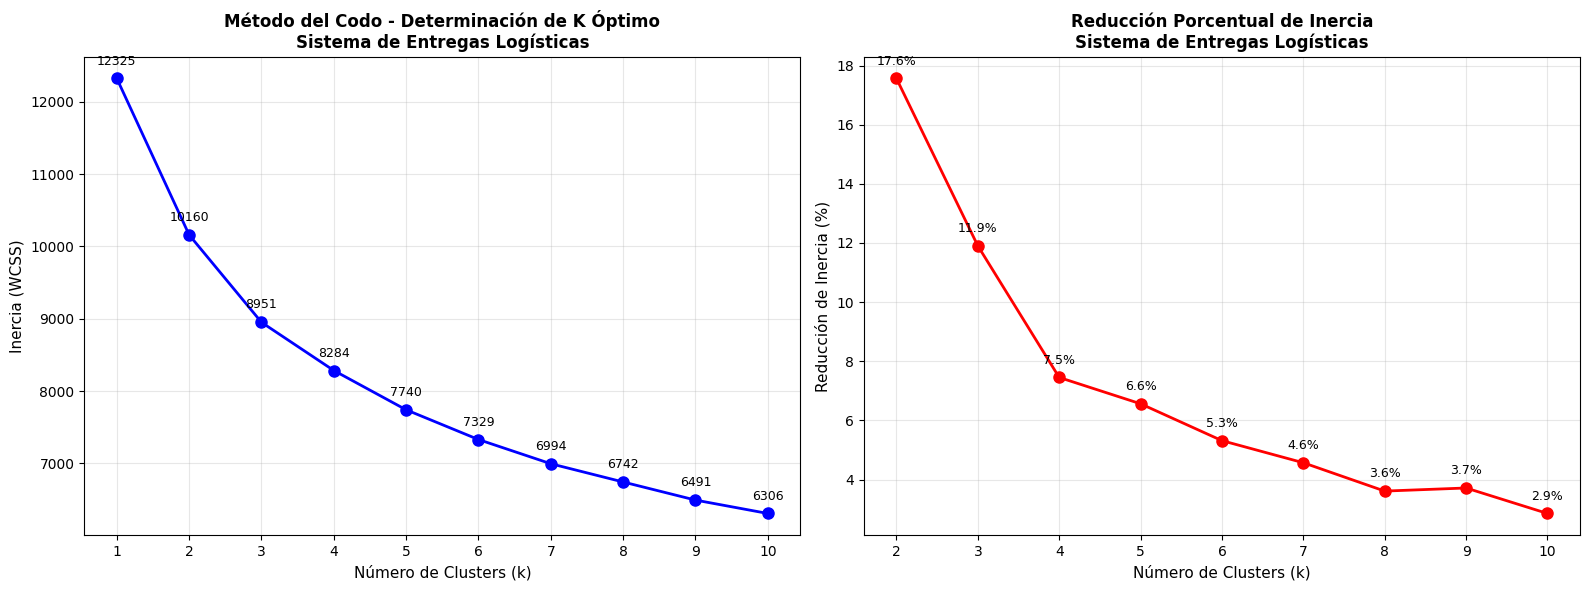


ANÁLISIS DE SILHOUETTE

Analizando k=2:
  Score promedio de silhouette: 0.168
    Cluster 0: 532 entregas, silhouette promedio: 0.208
    Cluster 1: 468 entregas, silhouette promedio: 0.121

Analizando k=3:
  Score promedio de silhouette: 0.185
    Cluster 0: 441 entregas, silhouette promedio: 0.142
    Cluster 1: 511 entregas, silhouette promedio: 0.209
    Cluster 2: 48 entregas, silhouette promedio: 0.314

Analizando k=4:
  Score promedio de silhouette: 0.162
    Cluster 0: 48 entregas, silhouette promedio: 0.303
    Cluster 1: 368 entregas, silhouette promedio: 0.162
    Cluster 2: 439 entregas, silhouette promedio: 0.178
    Cluster 3: 145 entregas, silhouette promedio: 0.067

Analizando k=5:
  Score promedio de silhouette: 0.135
    Cluster 0: 48 entregas, silhouette promedio: 0.296
    Cluster 1: 369 entregas, silhouette promedio: 0.127
    Cluster 2: 237 entregas, silhouette promedio: 0.131
    Cluster 3: 124 entregas, silhouette promedio: 0.085
    Cluster 4: 222 entregas, si

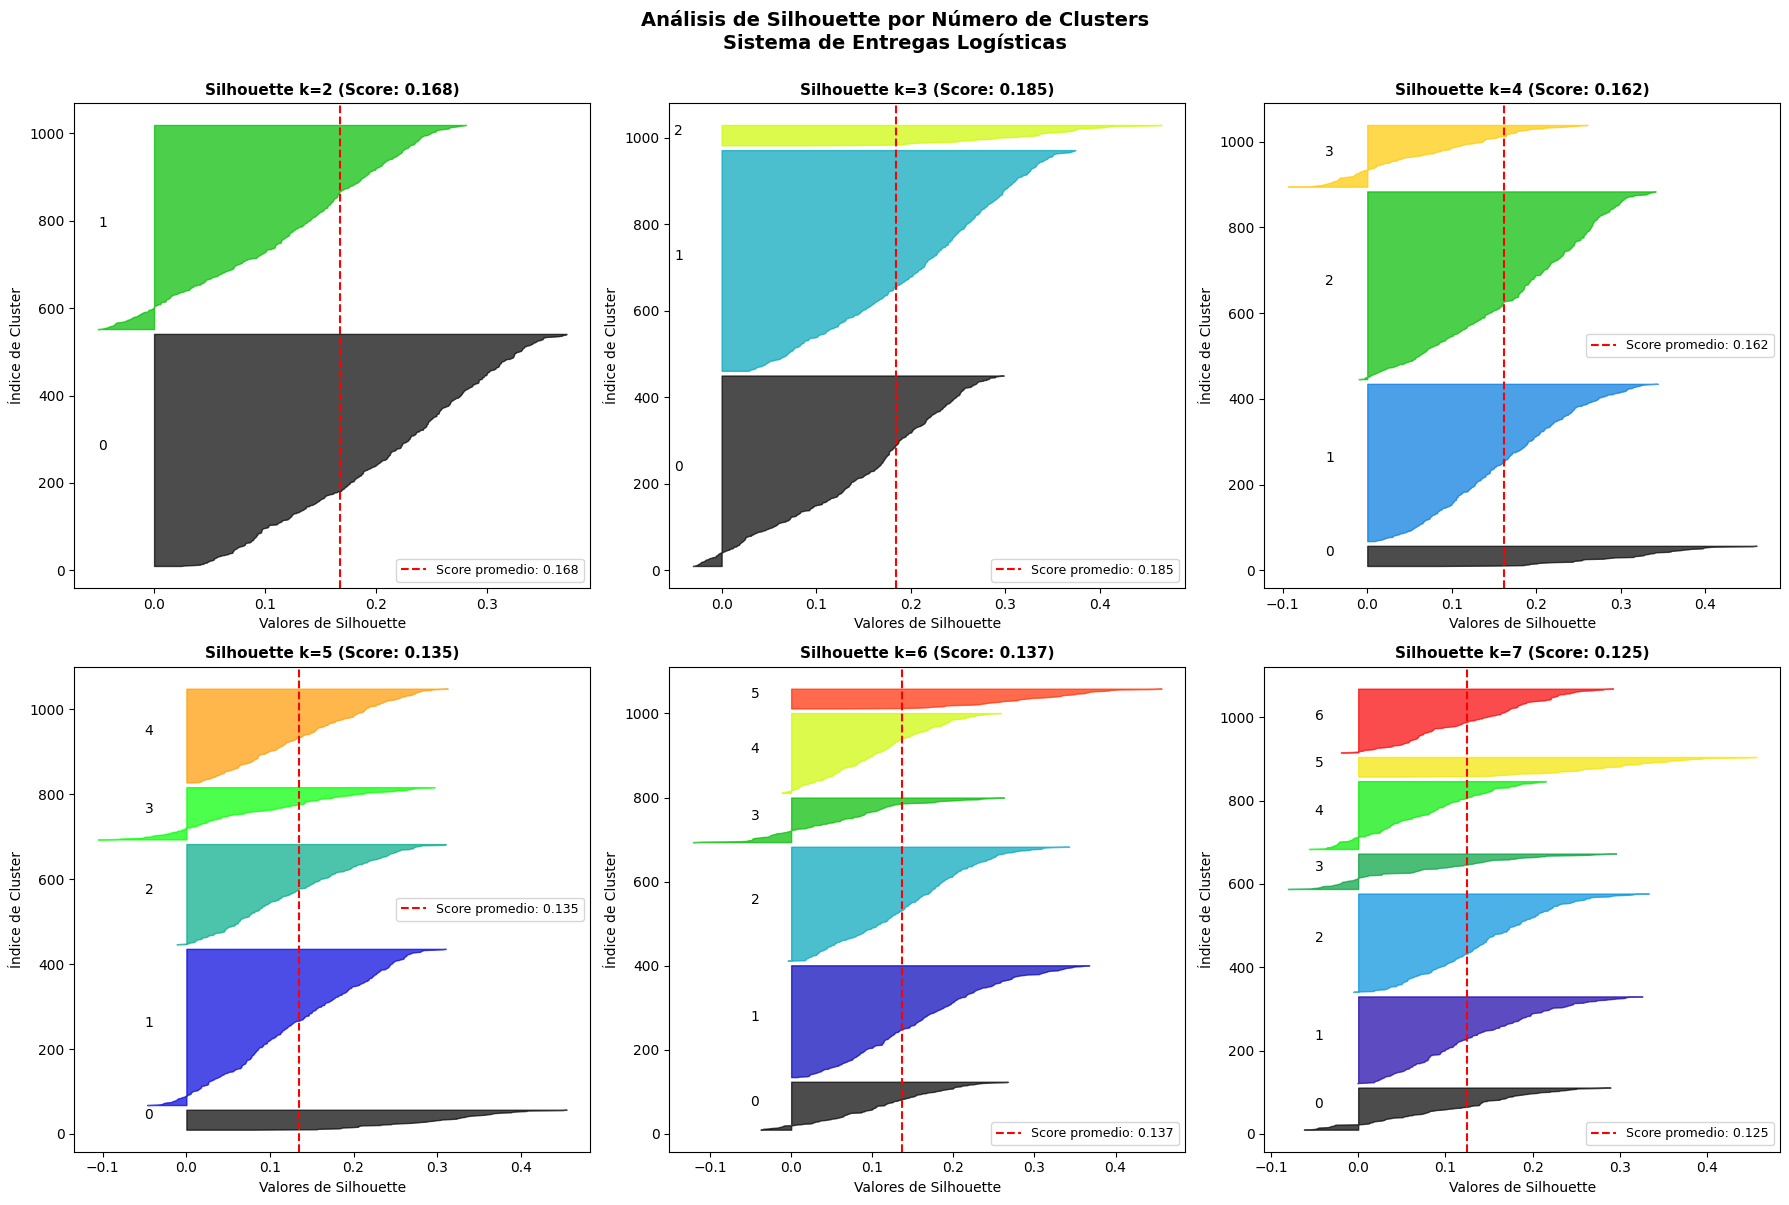

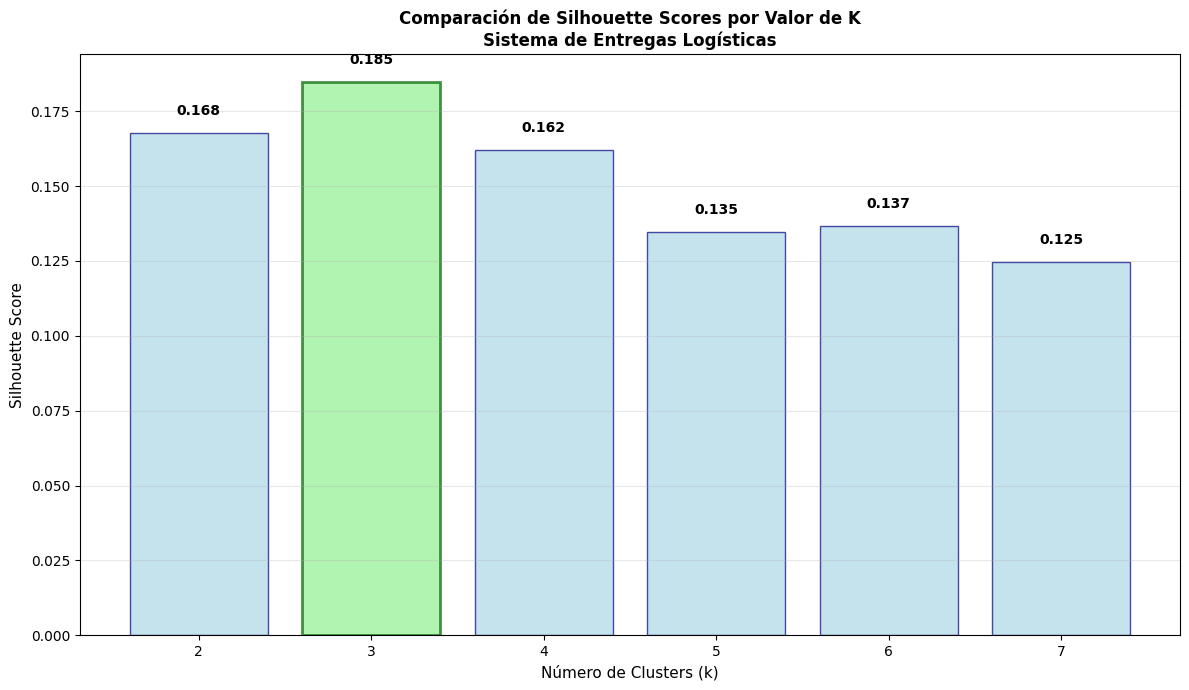


RESUMEN DE RESULTADOS Y RECOMENDACIONES

📊 MÉTODO DEL CODO:
   Mayor reducción de inercia: k=2 (17.6%)
   Análisis de reducción de inercia:
     📊 k=2: 17.6% de reducción
     📊 k=3: 11.9% de reducción
     📉 k=4: 7.5% de reducción
     📉 k=5: 6.6% de reducción
     📉 k=6: 5.3% de reducción
     📉 k=7: 4.6% de reducción
     📉 k=8: 3.6% de reducción
     📉 k=9: 3.7% de reducción
     📉 k=10: 2.9% de reducción

📈 ANÁLISIS DE SILHOUETTE:
   Mejor k según silhouette: k=3 (score: 0.185)
   Ranking de k por score de silhouette:
     🥇 1. k=3: 0.185
     🥈 2. k=2: 0.168
     🥉 3. k=4: 0.162
        4. k=6: 0.137
        5. k=5: 0.135
        6. k=7: 0.125

📊 INTERPRETACIÓN DE CALIDAD:
   Calidad del clustering con k=3: DÉBIL ⚠️
   Score: 0.185

🎯 RECOMENDACIÓN FINAL PARA K
   Método del codo sugiere: k=2
   Silhouette sugiere: k=3
   ✅ Ambos métodos convergen: k=3 es ÓPTIMO

📦 DISTRIBUCIÓN DE ENTREGAS EN CLUSTERS (k=3):
   Cluster 0:  441 entregas ( 44.1%) ██████████████████████
   Cluster 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# 1. Cargar los datos transformados por PCA
print("=" * 70)
print("DETERMINACIÓN DEL K ÓPTIMO PARA K-MEANS - SISTEMA DE ENTREGAS")
print("=" * 70)

# Cargar los datos PCA generados anteriormente
try:
    df_pca = pd.read_csv('entregas_pca_projection.csv')
    print(f"✅ Datos PCA cargados exitosamente: {df_pca.shape}")
    print(f"Columnas disponibles: {list(df_pca.columns)}")
    
    # Usar todos los componentes principales
    X_pca = df_pca.copy()
    
    print(f"\nDatos para análisis: {X_pca.shape}")
    print(f"Componentes principales: {list(X_pca.columns)}")
    
except FileNotFoundError:
    print("❌ Error: No se encuentra 'entregas_pca_projection.csv'")
    print("Ejecuta primero el script PCA_entregas.py para generar los datos transformados")
    exit()

# 2. Análisis del método del Codo (Elbow Method)
print(f"\n" + "=" * 70)
print("MÉTODO DEL CODO (ELBOW METHOD)")
print("=" * 70)

# Rango de clusters a probar
k_range = range(1, 11)
inertias = []
silhouette_scores = []

print("Calculando inercias y scores de silhouette...")
for k in k_range:
    print(f"Probando k={k}...", end=" ")
    
    # Entrenar K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_pca)
    
    # Guardar inercia
    inertias.append(kmeans.inertia_)
    
    # Calcular silhouette score (solo para k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"Inercia: {kmeans.inertia_:.2f}, Silhouette: {silhouette_avg:.3f}")
    else:
        silhouette_scores.append(0)  # No hay silhouette para k=1
        print(f"Inercia: {kmeans.inertia_:.2f}")

# 3. Visualización del método del codo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de inercias (método del codo)
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters (k)', fontsize=11)
ax1.set_ylabel('Inercia (WCSS)', fontsize=11)
ax1.set_title('Método del Codo - Determinación de K Óptimo\nSistema de Entregas Logísticas', 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Añadir valores en los puntos
for i, (k, inercia) in enumerate(zip(k_range, inertias)):
    ax1.annotate(f'{inercia:.0f}', (k, inercia), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Calcular y mostrar la diferencia relativa (para identificar el codo)
diferencias = []
for i in range(1, len(inertias)):
    diff = (inertias[i-1] - inertias[i]) / inertias[i-1] * 100
    diferencias.append(diff)

# Gráfico de diferencias porcentuales
ax2.plot(k_range[1:], diferencias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters (k)', fontsize=11)
ax2.set_ylabel('Reducción de Inercia (%)', fontsize=11)
ax2.set_title('Reducción Porcentual de Inercia\nSistema de Entregas Logísticas', 
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range[1:])

for i, (k, diff) in enumerate(zip(k_range[1:], diferencias)):
    ax2.annotate(f'{diff:.1f}%', (k, diff), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Análisis de Silhouette detallado
print(f"\n" + "=" * 70)
print("ANÁLISIS DE SILHOUETTE")
print("=" * 70)

# Probar un rango más específico para silhouette
k_silhouette_range = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

silhouette_results = {}

for idx, k in enumerate(k_silhouette_range):
    print(f"\nAnalizando k={k}:")
    
    # Entrenar K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Calcular silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
    
    # Guardar resultados
    silhouette_results[k] = {
        'avg_score': silhouette_avg,
        'sample_values': sample_silhouette_values,
        'cluster_labels': cluster_labels
    }
    
    print(f"  Score promedio de silhouette: {silhouette_avg:.3f}")
    
    # Crear gráfico de silhouette
    ax = axes[idx]
    y_lower = 10
    
    for i in range(k):
        # Valores de silhouette para cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiquetar cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_xlabel('Valores de Silhouette', fontsize=10)
    ax.set_ylabel('Índice de Cluster', fontsize=10)
    ax.set_title(f'Silhouette k={k} (Score: {silhouette_avg:.3f})', 
                fontsize=11, fontweight='bold')
    
    # Línea vertical para el score promedio
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", 
               label=f'Score promedio: {silhouette_avg:.3f}')
    ax.legend(fontsize=9)
    
    # Información por cluster
    for i in range(k):
        cluster_silhouette = sample_silhouette_values[cluster_labels == i]
        print(f"    Cluster {i}: {len(cluster_silhouette)} entregas, "
              f"silhouette promedio: {cluster_silhouette.mean():.3f}")

plt.suptitle('Análisis de Silhouette por Número de Clusters\nSistema de Entregas Logísticas', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 5. Gráfico comparativo de Silhouette Scores
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

metrics_k = list(silhouette_results.keys())
metrics_scores = [silhouette_results[k]['avg_score'] for k in metrics_k]

bars = ax.bar(metrics_k, metrics_scores, alpha=0.7, color='lightblue', edgecolor='navy')
ax.set_xlabel('Número de Clusters (k)', fontsize=11)
ax.set_ylabel('Silhouette Score', fontsize=11)
ax.set_title('Comparación de Silhouette Scores por Valor de K\nSistema de Entregas Logísticas', 
            fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(metrics_k)

# Añadir valores sobre las barras
for bar, score in zip(bars, metrics_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Resaltar el mejor k
best_idx = np.argmax(metrics_scores)
bars[best_idx].set_color('lightgreen')
bars[best_idx].set_edgecolor('darkgreen')
bars[best_idx].set_linewidth(2)

plt.tight_layout()
plt.show()

# 6. Resumen de resultados y recomendaciones
print(f"\n" + "=" * 70)
print("RESUMEN DE RESULTADOS Y RECOMENDACIONES")
print("=" * 70)

# Análisis del método del codo
print("\n📊 MÉTODO DEL CODO:")
max_diff_idx = np.argmax(diferencias)
codo_k = k_range[max_diff_idx + 1]
print(f"   Mayor reducción de inercia: k={codo_k} ({diferencias[max_diff_idx]:.1f}%)")

# Buscar el "codo" manualmente (donde la mejora se estabiliza)
print("   Análisis de reducción de inercia:")
for i, (k, diff) in enumerate(zip(k_range[1:], diferencias)):
    emoji = "🔥" if diff > 20 else "📊" if diff > 10 else "📉"
    print(f"     {emoji} k={k}: {diff:.1f}% de reducción")

# Análisis de silhouette
print(f"\n📈 ANÁLISIS DE SILHOUETTE:")
best_k_silhouette = max(silhouette_results.keys(), 
                       key=lambda k: silhouette_results[k]['avg_score'])
best_silhouette_score = silhouette_results[best_k_silhouette]['avg_score']

print(f"   Mejor k según silhouette: k={best_k_silhouette} "
      f"(score: {best_silhouette_score:.3f})")

print("   Ranking de k por score de silhouette:")
sorted_k = sorted(silhouette_results.keys(), 
                 key=lambda k: silhouette_results[k]['avg_score'], reverse=True)
for i, k in enumerate(sorted_k, 1):
    score = silhouette_results[k]['avg_score']
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"     {medal} {i}. k={k}: {score:.3f}")

# Interpretación de calidad del clustering
print(f"\n📊 INTERPRETACIÓN DE CALIDAD:")
if best_silhouette_score > 0.5:
    calidad = "EXCELENTE ⭐⭐⭐"
elif best_silhouette_score > 0.4:
    calidad = "BUENA ⭐⭐"
elif best_silhouette_score > 0.3:
    calidad = "ACEPTABLE ⭐"
else:
    calidad = "DÉBIL ⚠️"
print(f"   Calidad del clustering con k={best_k_silhouette}: {calidad}")
print(f"   Score: {best_silhouette_score:.3f}")

# 7. Recomendación final
print(f"\n" + "=" * 70)
print("🎯 RECOMENDACIÓN FINAL PARA K")
print("=" * 70)
print(f"   Método del codo sugiere: k={codo_k}")
print(f"   Silhouette sugiere: k={best_k_silhouette}")

# Decidir k óptimo basado en ambos métodos
if abs(codo_k - best_k_silhouette) <= 1:
    k_optimo = best_k_silhouette
    print(f"   ✅ Ambos métodos convergen: k={k_optimo} es ÓPTIMO")
else:
    k_optimo = best_k_silhouette  # Priorizamos silhouette
    print(f"   ⚖️  Métodos difieren. Recomendamos k={k_optimo} (mayor silhouette)")
    print(f"      También considera k={codo_k} como alternativa")

# Análisis de distribución de entregas en clusters
print(f"\n📦 DISTRIBUCIÓN DE ENTREGAS EN CLUSTERS (k={best_k_silhouette}):")
cluster_labels_best = silhouette_results[best_k_silhouette]['cluster_labels']
for i in range(best_k_silhouette):
    count = np.sum(cluster_labels_best == i)
    pct = (count / len(cluster_labels_best)) * 100
    bar_size = int(pct / 2)
    bar = "█" * bar_size
    print(f"   Cluster {i}: {count:4d} entregas ({pct:5.1f}%) {bar}")

# 8. Guardar resultados de la evaluación
print(f"\n" + "=" * 70)
print("GUARDANDO RESULTADOS DE EVALUACIÓN")
print("=" * 70)

# Guardar métricas de evaluación para todos los k probados
evaluation_results = pd.DataFrame({
    'k': k_range,
    'inertia': inertias,
    'silhouette_score': [0] + silhouette_scores[1:]  # k=1 no tiene silhouette
})

# Añadir reducción porcentual de inercia
evaluation_results['inertia_reduction_pct'] = [0] + diferencias

evaluation_results.to_csv('entregas_k_evaluation_results.csv', index=False)

print("✅ Archivos generados:")
print("   - entregas_k_evaluation_results.csv: Métricas de evaluación para cada k")

# Guardar información detallada del k óptimo
with open('entregas_k_optimo_recomendacion.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 70 + "\n")
    f.write("RECOMENDACIÓN DE K ÓPTIMO - SISTEMA DE ENTREGAS LOGÍSTICAS\n")
    f.write("=" * 70 + "\n\n")
    f.write(f"K óptimo recomendado: {k_optimo}\n")
    f.write(f"Silhouette Score: {best_silhouette_score:.3f}\n")
    f.write(f"Calidad del clustering: {calidad}\n\n")
    f.write(f"Método del codo sugiere: k={codo_k}\n")
    f.write(f"Silhouette sugiere: k={best_k_silhouette}\n\n")
    f.write("Distribución de entregas en clusters:\n")
    for i in range(best_k_silhouette):
        count = np.sum(cluster_labels_best == i)
        pct = (count / len(cluster_labels_best)) * 100
        f.write(f"  Cluster {i}: {count} entregas ({pct:.1f}%)\n")

print("   - entregas_k_optimo_recomendacion.txt: Recomendación detallada")

print(f"\n🎉 EVALUACIÓN DE K COMPLETADA")
print(f"   📋 Resultados guardados en: entregas_k_evaluation_results.csv")
print(f"   📄 Recomendación guardada en: entregas_k_optimo_recomendacion.txt")
print(f"   🎯 K óptimo recomendado: k={k_optimo}")
print(f"   📊 Silhouette score del k óptimo: {best_silhouette_score:.3f}")
print(f"   🏆 Calidad del clustering: {calidad}")

print(f"\n" + "=" * 70)
print("PRÓXIMOS PASOS")
print("=" * 70)
print(f"✅ Usa k={k_optimo} para entrenar tu modelo K-means final")
print("✅ Los archivos CSV contienen todas las métricas de evaluación")
print("✅ Puedes revisar k alternativas si necesitas más/menos clusters")
print("✅ Considera el contexto de negocio para la decisión final")

print(f"\n💡 INTERPRETACIÓN DE CLUSTERS PARA EL NEGOCIO:")
print("   Los clusters pueden representar:")
print("   • Tipos de entregas con características similares")
print("   • Patrones de demora y rendimiento")
print("   • Grupos de riesgo logístico")
print("   • Segmentos para optimización de rutas")